<h1>Лабораторная работа №7</h1>
<h1>Джураева Асел AIN-2-22</h1>

In [14]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'comp.graphics', 'sci.med', 'talk.politics.mideast']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

documents = dataset.data
print(f"Загружено {len(documents)} документов.")

Загружено 3893 документов.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)

tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words=custom_stop_words, max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print(f"Размерность матрицы TF-IDF: {tfidf_matrix.shape}")


Размерность матрицы TF-IDF: (3893, 10000)


In [16]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=25, random_state=42, learning_method='batch')
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(max_iter=25, random_state=42)

In [17]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)

Тема 1:
edu com university writes article know posting like don host

Тема 2:
ufl uga mcc ai lilley shots colour mcovingt georgia covington

Тема 3:
adam shostack das proposal adelaide endor sexual aa229 favors askew

Тема 4:
armenian turkish armenians armenia argic serdar muslims turkey turks muslim

Тема 5:
angmar cosmo missouri cnsvax uwec howell pro tga nyeda nye

Тема 6:
car cars pitt banks geb gordon engine com oil ford

Тема 7:
polygon photography krillean rind enterprise adl kirlian carl polygons bih

Тема 8:
eliot engr dyer mr2 engin diesels spdcc aas7 diesel muenchen

Тема 9:
yassin 3do nz hacker sas adobe xv radford ___ deir

Тема 10:
msg irvine portal 714 food sensitivity blah chinese danny superstition



In [18]:
document_topics = lda_model.transform(tfidf_matrix)

for i, doc_topics in enumerate(document_topics[:5]):
    print(f"Документ {i + 1}:")
    for topic_idx, topic_weight in enumerate(doc_topics):
        print(f"  Тема {topic_idx + 1}: {topic_weight:.4f}")
    print()

Документ 1:
  Тема 1: 0.6284
  Тема 2: 0.0125
  Тема 3: 0.0125
  Тема 4: 0.0125
  Тема 5: 0.0961
  Тема 6: 0.0125
  Тема 7: 0.0125
  Тема 8: 0.0562
  Тема 9: 0.1445
  Тема 10: 0.0125

Документ 2:
  Тема 1: 0.4404
  Тема 2: 0.0171
  Тема 3: 0.0171
  Тема 4: 0.0171
  Тема 5: 0.0171
  Тема 6: 0.3958
  Тема 7: 0.0442
  Тема 8: 0.0171
  Тема 9: 0.0171
  Тема 10: 0.0171

Документ 3:
  Тема 1: 0.6810
  Тема 2: 0.0141
  Тема 3: 0.0141
  Тема 4: 0.0294
  Тема 5: 0.0732
  Тема 6: 0.0142
  Тема 7: 0.0141
  Тема 8: 0.1314
  Тема 9: 0.0143
  Тема 10: 0.0142

Документ 4:
  Тема 1: 0.7281
  Тема 2: 0.0124
  Тема 3: 0.0124
  Тема 4: 0.0811
  Тема 5: 0.0124
  Тема 6: 0.1042
  Тема 7: 0.0124
  Тема 8: 0.0124
  Тема 9: 0.0124
  Тема 10: 0.0124

Документ 5:
  Тема 1: 0.4700
  Тема 2: 0.0157
  Тема 3: 0.0157
  Тема 4: 0.0157
  Тема 5: 0.0157
  Тема 6: 0.4043
  Тема 7: 0.0157
  Тема 8: 0.0157
  Тема 9: 0.0157
  Тема 10: 0.0157



In [19]:
documents = [
    "This movie was absolutely fantastic! The story was engaging and the actors were superb.",
    "I found this film to be boring and too long. The plot was not interesting.",
    "The special effects in this movie are stunning, but the story is quite weak.",
    "Great comedy! I laughed so much during the entire film.",
    "The horror elements were chilling, but thze ending was disappointing.",
    "A masterpiece of cinematography. Brilliant direction and outstanding performances.",
    "The script was poorly written, and the pacing was all over the place.",
    "This film had a lot of action and kept me on the edge of my seat!",
    "An emotional rollercoaster that left me in tears. Highly recommend!",
    "The soundtrack was amazing, but the story lacked depth.",
    "A thrilling adventure with lots of unexpected twists.",
    "This documentary was very informative and eye-opening.",
    "The romance was cheesy and predictable, but it was still enjoyable.",
    "I couldn't stop laughing. One of the best comedies I've seen!",
    "The movie was too dark and hard to follow at times.",
    "A visually stunning film with breathtaking cinematography.",
    "The characters were well-developed and relatable.",
    "I didn't like this movie at all. It was a waste of time.",
    "The historical aspect was very well portrayed. Truly inspiring!",
    "An absolute disaster. Everything about this movie was bad."
]

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS) + ["movie", "film", "story"]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(1, 3), max_features=1000)
X = vectorizer.fit_transform(documents)

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=25, random_state=42, learning_method='batch')
lda.fit(X)

LatentDirichletAllocation(max_iter=25, n_components=5, random_state=42)

In [23]:
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))
        print()

print_topics(lda, vectorizer)

Тема 1:
times dark hard dark dark hard follow follow follow times hard follow times hard follow hard waste

Тема 2:
relatable characters developed developed relatable characters developed relatable developed characters disaster disaster bad absolute disaster bad absolute disaster

Тема 3:
weak special effects stunning quite weak quite special stunning quite special effects stunning quite weak effects stunning quite effects stunning

Тема 4:
visually stunning visually stunning breathtaking visually stunning breathtaking cinematography stunning breathtaking breathtaking breathtaking cinematography opening informative eye opening documentary informative eye

Тема 5:
romance cheesy predictable enjoyable romance cheesy predictable romance predictable cheesy cheesy predictable cheesy predictable enjoyable enjoyable long plot interesting



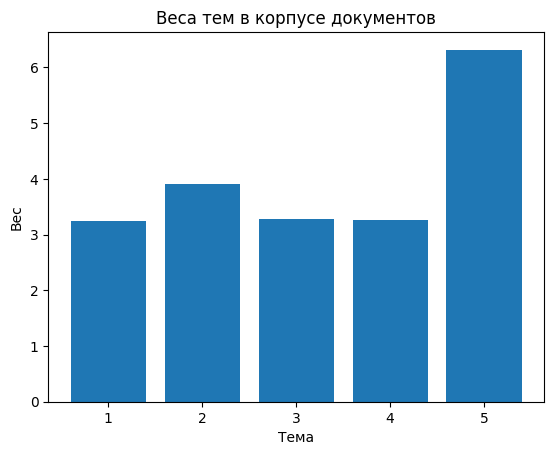

In [24]:
import numpy as np
import matplotlib.pyplot as plt

document_topics = lda.transform(X)
topic_weights = np.sum(document_topics, axis=0)

plt.bar(range(1, n_topics + 1), topic_weights)
plt.xlabel("Тема")
plt.ylabel("Вес")
plt.title("Веса тем в корпусе документов")
plt.show()